In [2]:
import networkx as nx
import pandas as pd
import numpy as np

import urllib
import json
import operator

import matplotlib as plot
import matplotlib.pyplot as plt
import seaborn as sn



['Livestock', 'Others', 'Arable farming', 'Specialized crops', nan]
13     5
0     22
3     19
19     4
1      2
23    27
16     1
7      6
8     14
14    12
11     8
22     9
12    26
10     3
9     18
15    21
4      7
24    16
6     23
21    20
2     15
17    13
5     10
20    28
18    11
Name: ego_id, dtype: int64 13    0.769231
0     0.538462
3     0.538462
19    0.538462
1     0.461538
23    0.461538
16    0.461538
7     0.461538
8     0.461538
14    0.461538
11    0.461538
22    0.384615
12    0.384615
10    0.384615
9     0.384615
15    0.307692
4     0.307692
24    0.307692
6     0.230769
21    0.230769
2     0.230769
17    0.153846
5     0.153846
20    0.153846
18    0.076923
Name: mitigation_measure, dtype: float64
mean  0.3723076923076922


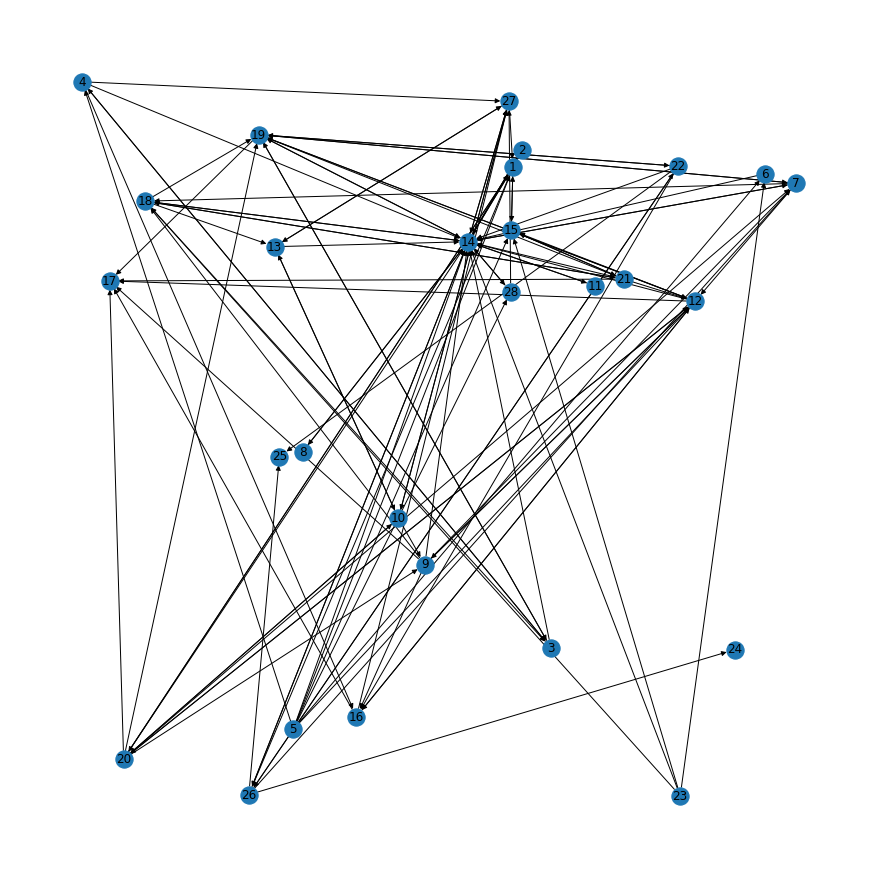

In [3]:

df = pd.read_csv ('resources/Atts_agroconcept_survey.csv',index_col=False,header=0)
df_edges = pd.read_csv ('resources/Edges_complete.csv',index_col=False,header=0)
#create a new column ccmm_score that averages all of the self_* columns
df['ccmm_score']= (df['self_reduc']+df['self_act']+df['self_cap']+df['self_conf']+df['self_not'])/5
#print(df['ego_id'],df['ccmm_score'])
df_raw = pd.read_csv ('resources/rawdata_new.csv',index_col=False,header=0)
#get list of nodes in network name1
nodes_in_name1=[]
nodes_with_edges=[]
nodes_with_edges = df_edges['sender_id'].unique().tolist()
#calculate measured mitigation
farmtype = df['farmtype'].unique().tolist()
print(farmtype)
df['mitigation_measure']=0
for i in df.index:
    mm_total=0
    if df['legum'][i] == 1 :
        mm_total+=1
    if df['conc'][i] == 1 :
        mm_total+=1
    if df['add'][i] == 1 :
        mm_total+=1
    if df['lact'][i] == 1 :
        mm_total+=1
    if df['breed'][i] == 1 :
        mm_total+=1
    if df['covman'][i] == 1 :
        mm_total+=1
    if df['comp'][i] == 1 :
        mm_total+=1
    if df['drag'][i] == 1 :
        mm_total+=1
    if df['cov'][i] == 1 :
        mm_total+=1
    if df['plough'][i] == 1 :
        mm_total+=1
    if df['solar'][i] == 1 :
        mm_total+=1
    if df['biog'][i] == 1 :
        mm_total+=1
    if df['ecodr'][i] == 1 :
        mm_total+=1
    df['mitigation_measure'][i] = mm_total/13
df.sort_values('mitigation_measure',ascending=False,inplace=True)
print(df['ego_id'],df['mitigation_measure'])
print("mean ",df['mitigation_measure'].mean())
df_raw = df_raw[~df_raw['id'].isin(nodes_with_edges)]
for i in df.index:
    if df['net_name1_neigh'][i] == 1 or df['net_name1_work'][i] == 1 or df['net_name1_frien'][i] == 1 or df['net_name1_fam'][i] == 1 or df['net_name1_part'][i] == 1 or df['net_name1_club'][i] == 1  or df['net_name1_vet'][i] == 1 or df['net_name1_ext'][i] == 1 or df['net_name1_oth'][i] == 1 :
        nodes_in_name1.append(df['ego_id'][i])

G = nx.from_pandas_edgelist(df_edges, source='sender_id', target='receiver_id', edge_attr=["advice_freq"],create_using=nx.DiGraph())

plt.figure(3,figsize=(12,12)) 
nx.draw_random(G,with_labels=True)
plt.show()


<AxesSubplot:>

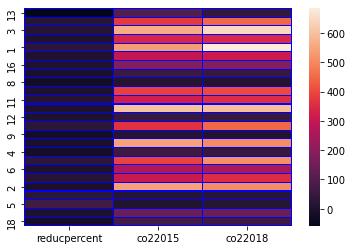

In [4]:
# plotting the heatmap
linewidths = .11
linecolor = "blue"

sn.heatmap(data=df[['reducpercent','co22015', 'co22018']],
                linewidths=linewidths,
                linecolor=linecolor, annot=False)


In [5]:
from decimal import *
node_max_degree = None  # the node which has the largest degree centrality value. This should be an integer. 
val_deg = None          # the centrality value of the node with the largest degree centrality. This should be a float. 

deg_dict = nx.degree_centrality(G)
centrality_matrix = sorted(deg_dict.items(), key=lambda item:item[1],reverse=True)
maximum= centrality_matrix[0]
node_max_degree = maximum[0]
val_deg = maximum[1]


#calculate betweenness
bc = nx.betweenness_centrality(G)
bc_dict = sorted(bc.items(), key=lambda item:item[1],reverse=True)#[-5:])
print('centrality: ',centrality_matrix)
print('betweenness: ' ,bc_dict)

centrality:  [(14, 1.1481481481481481), (19, 0.5185185185185185), (12, 0.5185185185185185), (20, 0.4074074074074074), (1, 0.37037037037037035), (27, 0.37037037037037035), (18, 0.37037037037037035), (7, 0.3333333333333333), (9, 0.3333333333333333), (26, 0.2962962962962963), (21, 0.2962962962962963), (15, 0.25925925925925924), (16, 0.25925925925925924), (5, 0.25925925925925924), (10, 0.25925925925925924), (22, 0.25925925925925924), (3, 0.2222222222222222), (4, 0.2222222222222222), (17, 0.2222222222222222), (13, 0.2222222222222222), (28, 0.14814814814814814), (23, 0.14814814814814814), (2, 0.1111111111111111), (6, 0.1111111111111111), (8, 0.07407407407407407), (11, 0.07407407407407407), (25, 0.07407407407407407), (24, 0.037037037037037035)]
betweenness:  [(14, 0.4104610410165966), (19, 0.09730701397368065), (26, 0.07488355266133044), (12, 0.07328268439379552), (18, 0.06922285533396645), (1, 0.06071880794103016), (27, 0.055384841495952616), (3, 0.03304051915163026), (20, 0.0325984714873603

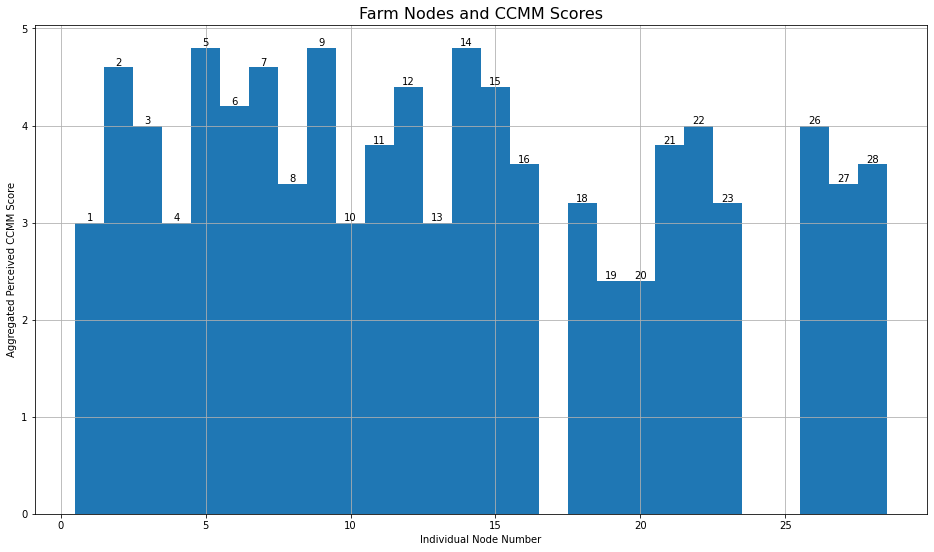

In [6]:
x=[]
x_nodes=[]
y=[]
for entry in centrality_matrix:
    if entry[0] in nodes_with_edges:
        x.append(entry[1])
        x_nodes.append(entry[0])

for node in x_nodes:
    if node in nodes_with_edges:
        y.append(df[df['ego_id']==node]['ccmm_score'].values[0])


plt.figure(figsize=(16,9))
line=plt.bar(x_nodes,y, width=1)
plt.xlabel('Individual Node Number')
plt.ylabel('Aggregated Perceived CCMM Score')

for i in range(len(x)):
    plt.annotate(str(x_nodes[i]), xy=(x_nodes[i],y[i]), ha='center', va='bottom')

plt.title('Farm Nodes and CCMM Scores', fontsize=16)
plt.grid()
plt.show()


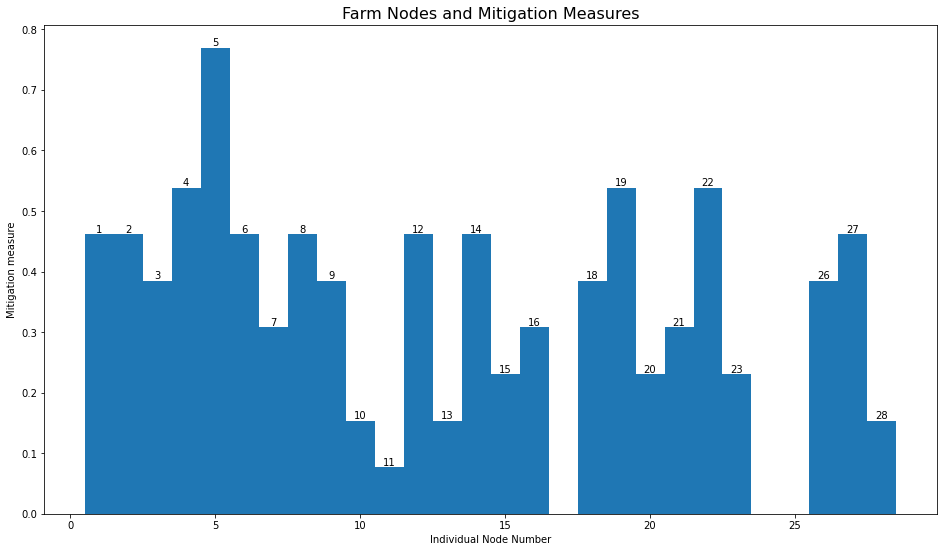

In [7]:
x=[]
x_nodes=[]
y=[]
for entry in centrality_matrix:
    if entry[0] in nodes_with_edges:
        x.append(entry[1])
        x_nodes.append(entry[0])

for node in x_nodes:
    if node in nodes_with_edges:
        y.append(df[df['ego_id']==node]['mitigation_measure'].values[0])

plt.figure(figsize=(16,9))
line=plt.bar(x_nodes,y, width=1)
plt.xlabel('Individual Node Number')
plt.ylabel('Mitigation measure')

for i in range(len(x)):
    plt.annotate(str(x_nodes[i]), xy=(x_nodes[i],y[i]), ha='center', va='bottom')

plt.title('Farm Nodes and Mitigation Measures', fontsize=16)
plt.show()

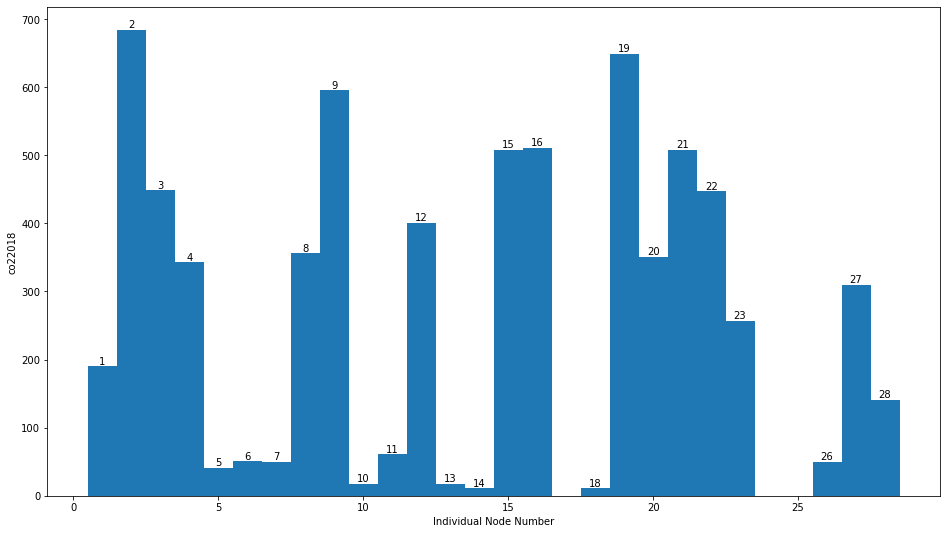

In [8]:
#maybe plot the bars in order, from highest centrality to last

x=[]
x_nodes=[]
y=[]
for entry in centrality_matrix:
    if entry[0] in nodes_with_edges:
        x.append(entry[1])
        x_nodes.append(entry[0])

for node in x_nodes:
    if node in nodes_with_edges:
        y.append(df[df['ego_id']==node]['co22018'].values[0])

plt.figure(figsize=(16,9))
line=plt.bar(x_nodes,y, width=1)
plt.xlabel('Individual Node Number')
plt.ylabel('co22018')

for i in range(len(x)):
    plt.annotate(str(x_nodes[i]), xy=(x_nodes[i],y[i]), ha='center', va='bottom')


plt.show()

In [9]:
max_5_cc = []  # a list of 5 nodes with the largest closeness centrality values
min_5_cc = []  # a list of 5 nodes with the smallest closeness centrality values
# YOUR CODE HERE
cc = nx.closeness_centrality(G)
cc_dict = sorted(cc.items(), key=lambda item:item[1],reverse=True)#[-5:])
max_5_cc = [x[0] for x in cc_dict[:5]] # use list comprehension to get node only
min_5_cc = [x[0] for x in cc_dict[-5:]] # use list comprehension to get node only
print('The 5 nodes with the largest closeness centrality values are', max_5_cc)
print('The 5 nodes with the smallest closeness centrality values are', min_5_cc)

The 5 nodes with the largest closeness centrality values are [14, 19, 1, 27, 18]
The 5 nodes with the smallest closeness centrality values are [24, 4, 6, 5, 23]


In [10]:
max_5_bc = []  # a list of 5 nodes with the largest betweenness centrality values
min_5_bc = []  # a list of 5 nodes with the smallest betweenness centrality values

# YOUR CODE HERE
bc = nx.betweenness_centrality(G)
bc_dict = sorted(bc.items(), key=lambda item:item[1],reverse=True)#[-5:])
max_5_bc = [x[0] for x in bc_dict[:5]] # use list comprehension to get top 5 nodes only
min_5_bc = [x[0] for x in bc_dict[-5:]] # use list comprehension to get bottom 5 nodes only
print(max_5_bc, min_5_bc)

[14, 19, 26, 12, 18] [17, 11, 25, 23, 24]


In [11]:
graph_trans = None      # graph transitivity. This should be a float. 
avg_clustering = None   # average clustering coefficient value. This should be a float. 

# YOUR CODE HERE
graph_trans = nx.transitivity(G)
avg_clustering = nx.average_clustering(G)
print(graph_trans,avg_clustering)


0.27800829875518673 0.32457719573884614


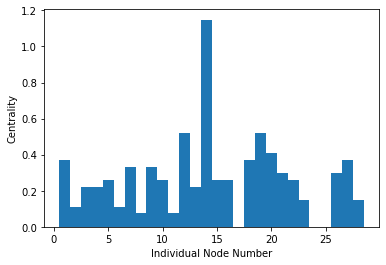

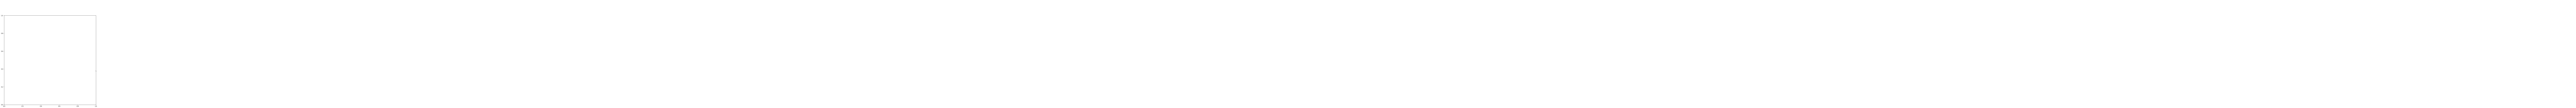

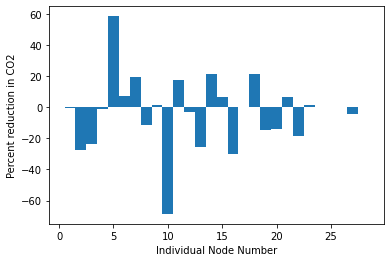

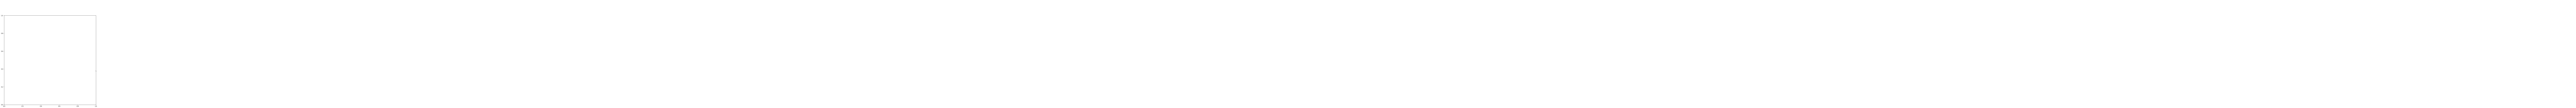

In [12]:
x=[]
x_nodes=[]
y=[]
for entry in centrality_matrix:
    if entry[0] in nodes_with_edges:
        y.append(entry[1])
        x_nodes.append(entry[0])

line=plt.bar(x_nodes,y, width=1)
plt.xlabel('Individual Node Number')
plt.ylabel('Centrality')
plt.figure(figsize=(12,12))
for i in range(len(x_nodes)):
    plt.annotate(str(x_nodes[i]), xy=(x_nodes[i],y[i]), ha='center', va='bottom')
plt.show()
#plot nodes with reducpercent
y2=[]

for node in x_nodes:
    if node in nodes_with_edges:
        y2.append(-(df[df['ego_id']==node]['reducpercent'].values[0]))

line=plt.bar(x_nodes,y2, width=1)
plt.xlabel('Individual Node Number')
plt.ylabel('Percent reduction in CO2')
plt.figure(figsize=(12,12))
for i in range(len(x_nodes)):
    plt.annotate(str(x_nodes[i]), xy=(x_nodes[i],y[i]), ha='center', va='bottom')

plt.show()

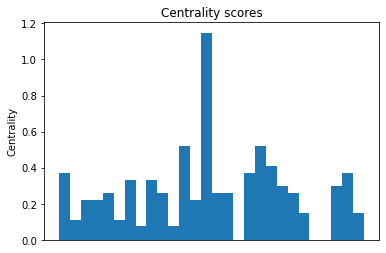

In [13]:
import matplotlib.pyplot as plt

#x=[]
x_nodes=[]
y=[]
for entry in centrality_matrix:
    if entry[0] in nodes_with_edges:
        y.append(entry[1])
        x_nodes.append(entry[0])
fig,ax= plt.subplots(1,1)

ax.bar(x_nodes,y, width=1)
ax.set_title('Centrality scores')
ax.set_ylabel('Centrality')
ax.get_xaxis().set_visible(False)

for i in range(len(x)):
    ax.annotate(str(x_nodes[i]), xy=(x_nodes[i],y[i]), ha='center', va='bottom')


plt.show()

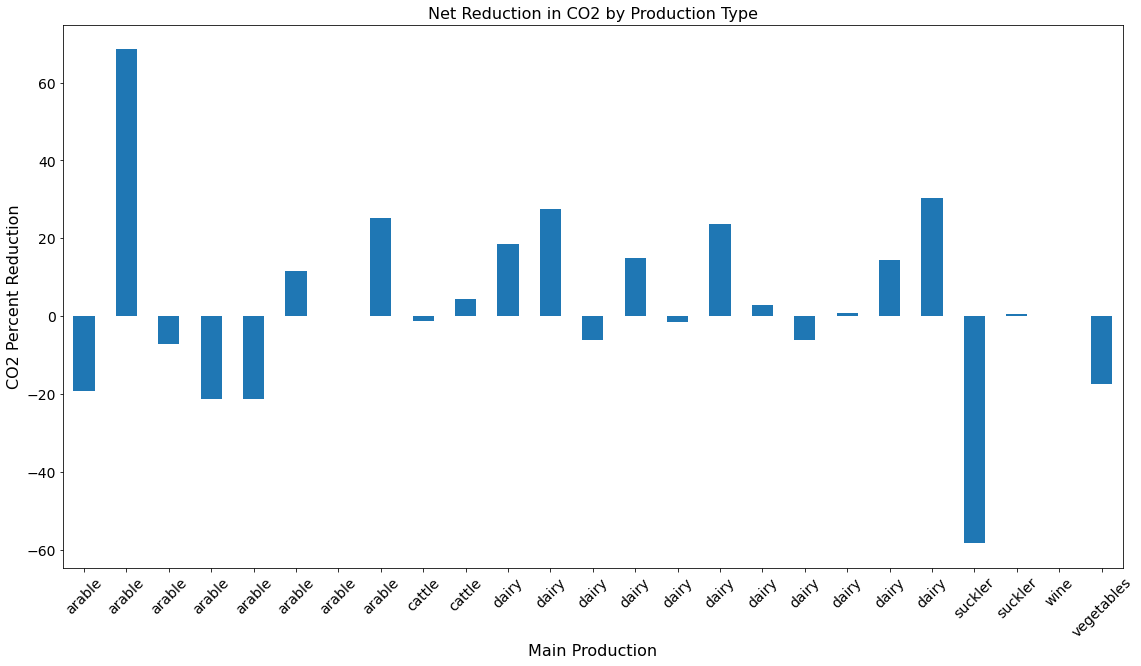

In [14]:
['mainprodcution','reducpercent']

df = pd.read_csv ('resources/Atts_agroconcept_survey.csv',index_col=False,header=0)
df3 = pd.DataFrame(df, columns=['mainprodcution','reducpercent'])
#

field = "mainprodcution"
sort_order = ["arable", "cattle", "dairy", "suckler", "wine", "vegetables"]
ax = df3.set_index(field).loc[sort_order].plot(kind="bar", legend=False, figsize=(19,10))
ax.set_xlabel("Main Production", fontsize=16)
ax.set_ylabel("CO2 Percent Reduction", fontsize=16)
ax.set_title('Net Reduction in CO2 by Production Type', fontsize=16)
plt.xticks(rotation = 45, fontsize=14)
plt.yticks(fontsize=14)
plt.xticks()


plt.show()

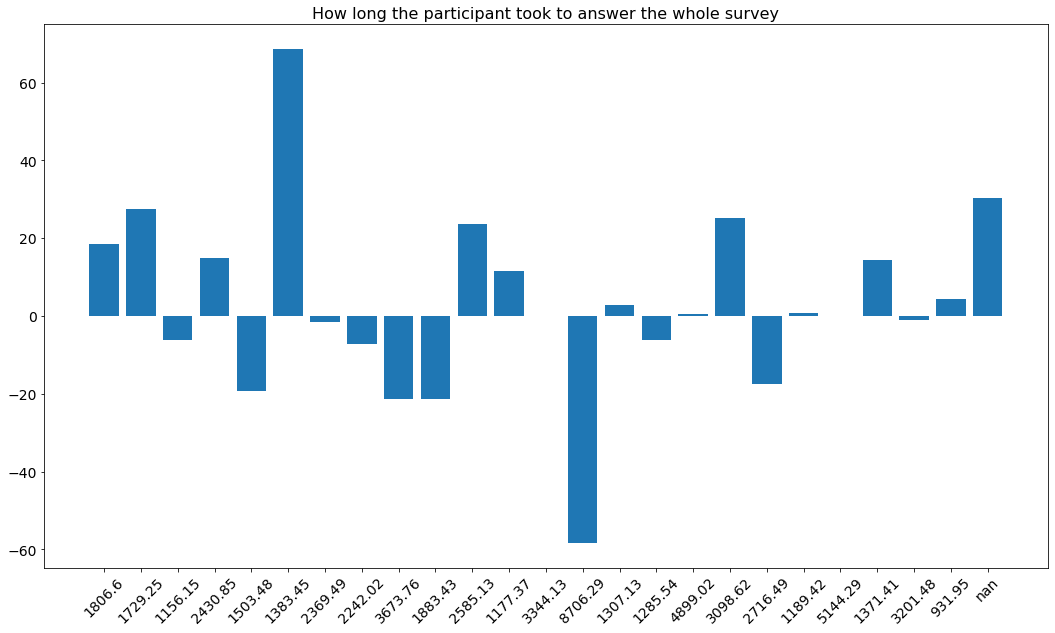

In [15]:
df = pd.read_csv ('resources/Atts_agroconcept_survey.csv',index_col=False,header=0)
df4 = pd.DataFrame(df, columns=['interviewtime','reducpercent'])
#
fig1, ax1 = plt.subplots(figsize=(18,10))
ax1.set_title('How long the participant took to answer the whole survey', fontsize=16)
ax1.bar(np.arange(len(df)), df['reducpercent'])
ax1.set_xticks(np.arange(len(df)))
ax1.set_xticklabels(df['interviewtime'])
ax.set_xlabel("Duration of Interview (s)", fontsize=16)
ax.set_ylabel("CO2 Percent Reduction", fontsize=16)
plt.xticks(rotation = 45, fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Text(0.5, 1.0, 'Impactful Farms and Net Reduction of CO2')

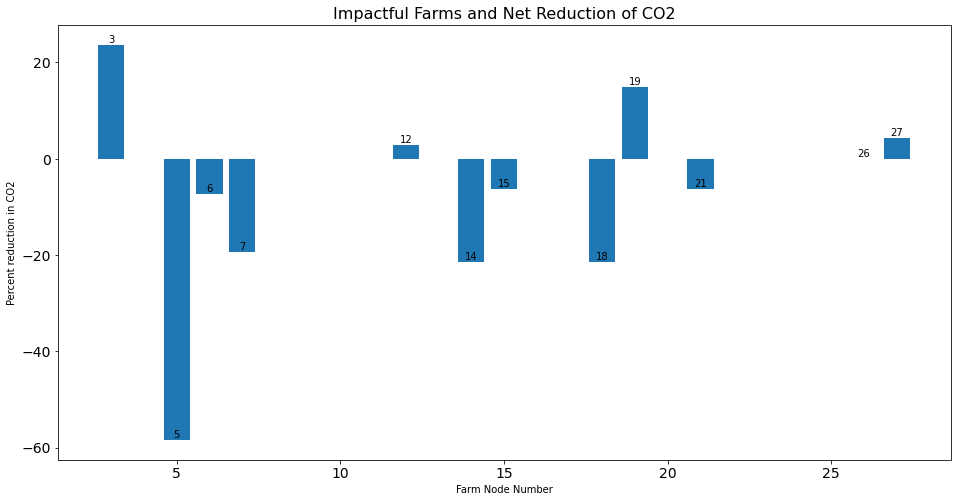

In [16]:
#get the nodes(farms) with more than 5 networks
impactful_farms=[]
impactful_co2_reduction=[]
for i in df.index:
    if df['network'][i] >= 6 :
        impactful_farms.append(df['ego_id'][i])

#print(impactful_farms)
for farm in impactful_farms:
    #print(df[df['ego_id']==farm])
    impactful_co2_reduction.append(df[df['ego_id']==farm]['reducpercent'].values[0])
#print(impactful_co2_reduction)

plt.figure(figsize=(16,8))
plt.bar(impactful_farms,impactful_co2_reduction)

plt.xlabel('Farm Node Number')
plt.ylabel('Percent reduction in CO2')
ax.set_xlabel("", fontsize=16)
ax.set_ylabel("", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


for i in range(len(impactful_farms)):
    plt.annotate(str(impactful_farms[i]), xy=(impactful_farms[i],impactful_co2_reduction[i]), ha='center', va='bottom')
    
plt.title('Impactful Farms and Net Reduction of CO2', fontsize=16)

In [17]:
#pip install altair=5
import altair as alt


part_df = pd.read_csv ('resources/Atts_agroconcept_int.csv',index_col=False,header=0)
nonpart_df = pd.read_csv ('resources/Atts_nonpart_int.csv',index_col=False,header=0)
#add a field to represents participant/nonparticipant to both dataframes for Altairs legend
part_df['Conference participant']='Yes'
nonpart_df['Conference participant']='No'
part_df['mean'] = part_df['CC_import_change'].mean()
nonpart_df['mean'] = nonpart_df['CC_import_change_nonpart'].mean()

#the fields they share are = 'ego_id', 'CC_import_change' ('CC_import_change_nonpart'), 'furt_reduc' ('furt_reduc_nonpart'), 'CC_import' ('CC_import_nonpart')


chart1 = alt.Chart(part_df,title="How important is climate change mitigation for your decisions on the farm today compared to 10 years ago?").encode(
        y=alt.Y('CC_import_change',title="Importance"),
        x=alt.X('ego_id:N',title='Farm ID',axis=alt.Axis(labels=False)),
        text='ego_id'
        
)


bars = chart1.mark_bar().encode(color='Conference participant')
text = chart1.mark_text(align='center',fontWeight='bold',dy=-6)
rule = alt.Chart(part_df).mark_rule(strokeWidth=.2).encode(y='mean:Q',color='Conference participant'
)
chart2 = alt.Chart(nonpart_df,title="How important is climate change mitigation for your decisions on the farm today compared to 10 years ago?").encode(
        y=alt.Y('CC_import_change_nonpart',title="Importance"),
        x=alt.X('ego_id_nonpart:N',title='Farm ID',axis=alt.Axis(labels=False)),
      
        text='ego_id_nonpart'
        )

bars2=chart2.mark_bar().encode(color='Conference participant')
text2 = chart2.mark_text(align='center',dy=-6,fontWeight='bold')
rule2 = alt.Chart(nonpart_df).mark_rule(color='purple',strokeWidth=.2).encode(y='mean:Q',color='Conference participant')
text5 = (
    alt.Chart(part_df)
    .mark_text(text=['Gold line represents the mean for attendees', 'Blue line represents the mean for non-attendees'],fontWeight='normal', x='width', y='height', dx = 10, dy=40)
  
)


(bars + bars2 + text5 +text2+rule + rule2+text).properties(
    width=800,
    height=350,
    
)


alt.LayerChart(...)

In [18]:
part_df['mean'] = part_df['furt_reduc'].mean()
nonpart_df['mean'] = nonpart_df['furt_reduc_nonpart'].mean()


chart1 = alt.Chart(part_df,title="Do you consider to implement further mitigation measures on your farm?").encode(
        y=alt.Y('furt_reduc',title=["Binary response:",' ', "0=No, 1=Yes, 2=Maybe"], axis=alt.Axis(tickMinStep=1,labelAngle=0)),
        x=alt.X('ego_id:N',title='Farm ID',axis=alt.Axis(labels=False)),
        
        text='ego_id'
        )
bars = chart1.mark_bar().encode(color='Conference participant')

rule = alt.Chart(part_df).mark_rule().encode(y='mean:Q',color='Conference participant')
chart2 = alt.Chart(nonpart_df,title="Do you consider to implement further mitigation measures on your farm?").encode(
        y=alt.Y('furt_reduc_nonpart',title=["Binary response:",' ', "0=No, 1=Yes, 2=Maybe"], axis=alt.Axis(tickMinStep=1,labelAngle=0)),
        x=alt.X('ego_id_nonpart:N',title='Farm ID',axis=alt.Axis(labels=False)),
        
        text='ego_id_nonpart'
        )


bars2=chart2.mark_bar().encode(color='Conference participant')

rule2 = alt.Chart(nonpart_df).mark_rule().encode(y='mean:Q',color='Conference participant')
text5 = (
    alt.Chart(part_df)
    .mark_text(text=['Gold line represents the mean for attendees', 'Blue line represents the mean for non-attendees'],fontWeight='normal', x='width', y='height', dx = 10, dy=40)
  
)

text = chart1.mark_text(align='center',fontWeight='bold',dy=-6)
text2 = chart2.mark_text(align='center',dy=-6,fontWeight='bold')
#((bars + text + rule)  + (bars2 + text2) ).properties(
(bars + bars2 +text + text2 + rule + rule2+text5).properties(
    width=750,
    height=350,
    

).configure_axis(
    labelFontWeight=100,
    labelFontSize=10,
    titleFontSize=12
)

alt.LayerChart(...)

In [19]:

part_df['mean'] = part_df['CC_import'].mean()
nonpart_df['mean'] = nonpart_df['CC_import_nonpart'].mean()


chart1 = alt.Chart(part_df,title="How important is climate change mitigation for your decisions on the farm?").encode(
        y=alt.Y('CC_import',title="Importance"),
        x=alt.X('ego_id:N',title='Farm ID',axis=alt.Axis(labels=False)),
        
        text='ego_id'
        )

bars = chart1.mark_bar().encode(color='Conference participant')
text = chart1.mark_text(align='center',fontWeight='bold',dy=-6)
rule = alt.Chart(part_df).mark_rule().encode(y='mean:Q',color='Conference participant')
chart2 = alt.Chart(nonpart_df,title="How important is climate change mitigation for your decisions on the farm?").encode(
        y=alt.Y('CC_import_nonpart',title="Importance"),
        x=alt.X('ego_id_nonpart:N',title='Farm ID',axis=alt.Axis(labels=False)),
        
        text='ego_id_nonpart'
        )

bars2=chart2.mark_bar().encode(color='Conference participant')
text2 = chart2.mark_text(align='center',dy=-6,fontWeight='bold')
rule2 = alt.Chart(nonpart_df).mark_rule(color='purple').encode(y='mean:Q',color='Conference participant')
#((bars + text + rule)  + (bars2 + text2) ).properties(

text5 = (
    alt.Chart(part_df)
    .mark_text(text=['Gold line represents the mean for attendees', 'Blue line represents the mean for non-attendees'],fontWeight='normal', x='width', y='height', dx = 10, dy=40)
    
)


(bars + bars2 +text + text2 + rule + rule2+text5).properties(
    width=800,
    height=350,
    
)

alt.LayerChart(...)